<a href="https://colab.research.google.com/github/i2mmmmm/Study/blob/main/Pytorch/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 합성곱신경망 CNN(Convolutional Neural Network)
# 주로 이미지 처리와 관련된 작업에서 효과적으로 사용되는 신경망 구조

# 1. CNN 모델 정의
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
  def __init__(self, num_classes=10):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.fc1 = nn.Linear(64*7*7, num_classes)

  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)
    x = x.view(x.size(0),-1)
    x = self.fc1(x)
    return x


In [2]:
# 2. 손실함수, 최적화함수 정의

model = SimpleCNN(num_classes = 10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
# 3. 이미지 데이터 준비

import torchvision
import torchvision.transforms as transforms

# 데이터 로드
# 손글씨 숫자 데이터(MNIST)를 가져옴

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train= True, download = True, transform = transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train= False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=64, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 64, shuffle = False)

In [5]:
## 4. CNN 모델 훈련

num_epochs = 10

for epoch in range(num_epochs):
  for images, labels in train_loader:
    optimizer.zero_grad()             # 기울기 초기화
    outputs = model(images)           # 순전파 (forward pass)
    loss = criterion(outputs, labels) # 손실 계산
    loss.backward()                   # 역전파 (Backward Pass)
    optimizer.step()                  # 최적화


In [9]:
# 5. 훈련된 모델로 이미지 분류 예측

with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = correct/total
print(f'Accuracy on the test set : {accuracy}')

Accuracy on the test set : 0.9911


ValueError: num must be an integer with 1 <= num <= 20, not 21

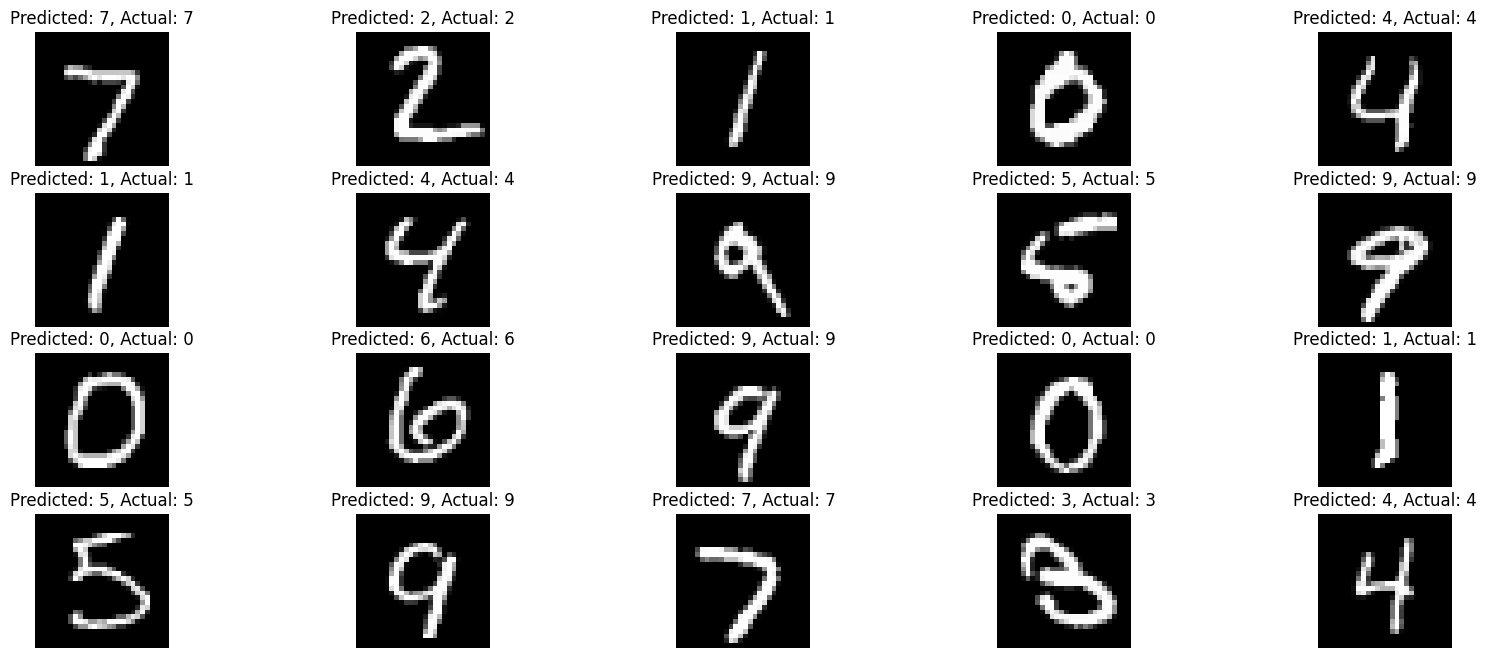

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 평가
model.eval()

with torch.no_grad():
    # DataLoader 객체를 이터레이터로 변환
    data_iter = iter(test_loader)

    # 테스트 데이터셋에서 미니배치 가져오기
    images, labels = next(data_iter)

    # 모델 예측
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # 이미지와 예측 결과 시각화
    plt.figure(figsize=(20, 8))
    for i in range(images.size(0)):
        plt.subplot(4, 5, i + 1)
        plt.imshow(np.squeeze(images[i]), cmap='gray')
        plt.title(f'Predicted: {predicted[i].item()}, Actual: {labels[i].item()}')
        plt.axis('off')

    plt.show()


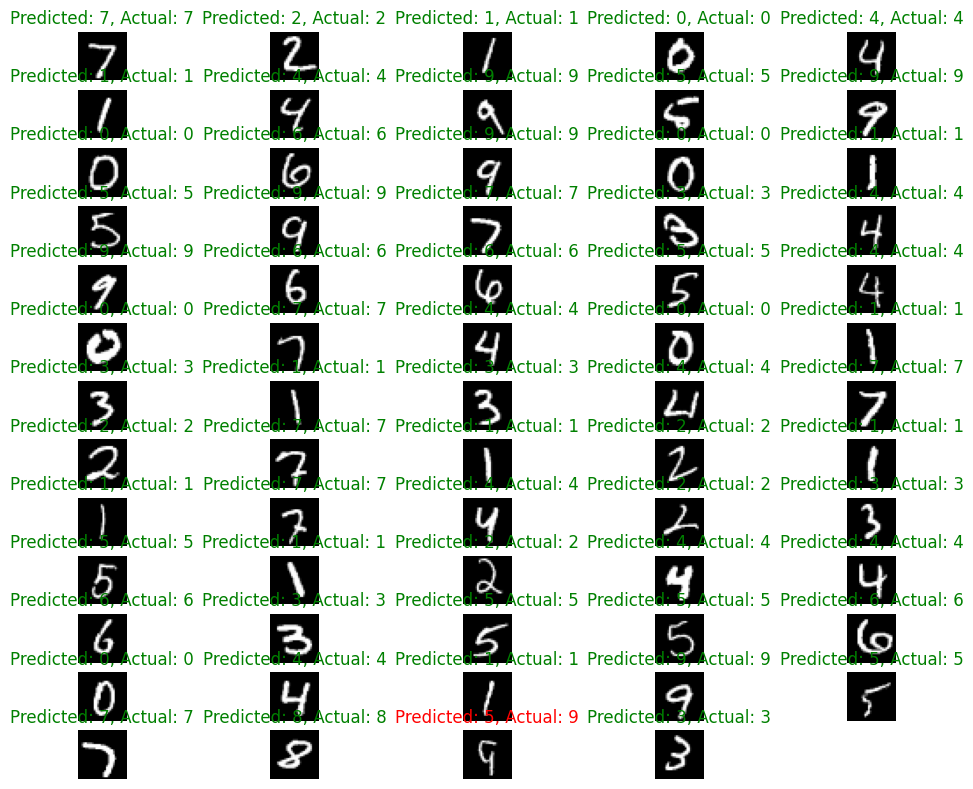

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 평가
model.eval()

with torch.no_grad():
    # DataLoader 객체를 이터레이터로 변환
    data_iter = iter(test_loader)

    # 테스트 데이터셋에서 미니배치 가져오기
    images, labels = next(data_iter)

    # 모델 예측
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # 이미지와 예측 결과 시각화
    plt.figure(figsize=(12, 15))
    for i in range(images.size(0)):
        plt.subplot(20, 5, i + 1)

        # 예측이 정확한 경우 초록색, 아닌 경우 빨간색으로 표시
        color = 'green' if predicted[i] == labels[i] else 'red'

        plt.imshow(np.squeeze(images[i]), cmap='gray')
        plt.title(f'Predicted: {predicted[i].item()}, Actual: {labels[i].item()}', color=color)
        plt.axis('off')

    plt.show()